<a href="https://colab.research.google.com/github/gks2022004/INDRA_MODEL/blob/main/cloudburst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-fae3549a04e0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


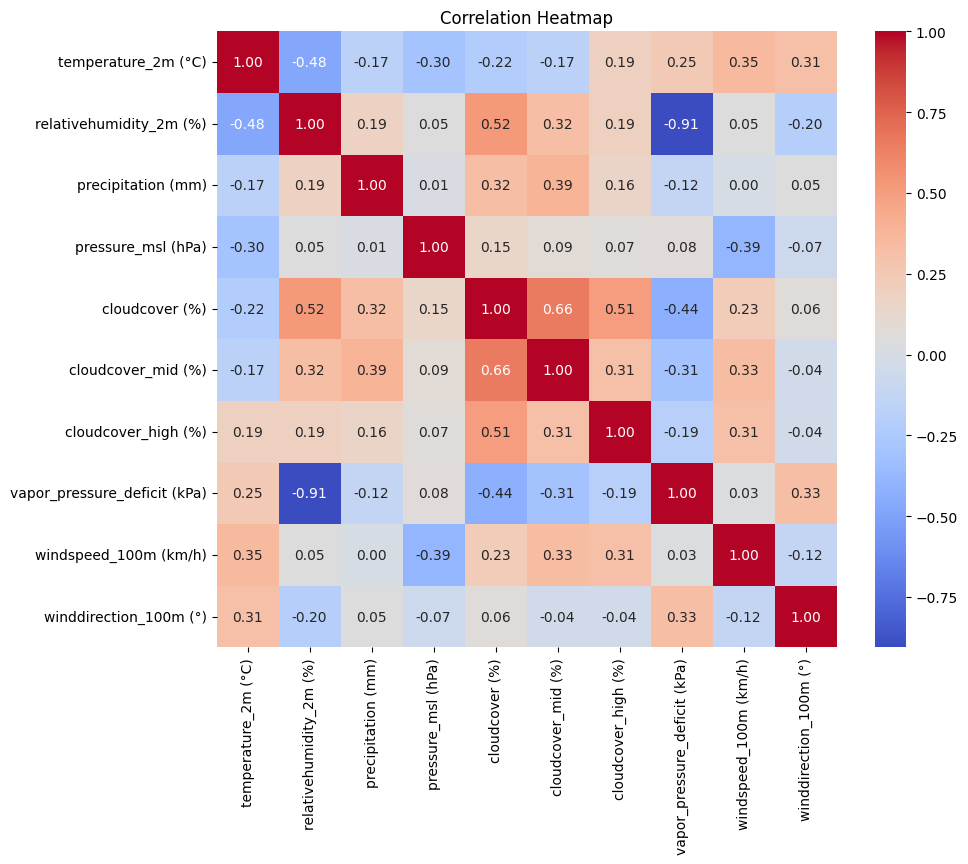

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/cloud burst.csv', encoding='ISO-8859-1')


correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd


data = pd.read_csv('/content/cloud burst.csv', encoding='ISO-8859-1')

correlation_matrix = data.corr().abs()

mask = ~pd.np.eye(correlation_matrix.shape[0], dtype=bool)

mask = mask.reshape(-1)

strong_correlations = correlation_matrix.stack()[mask].sort_values(ascending=False)

threshold = 0.8

strong_correlations = strong_correlations[strong_correlations > threshold]

print("Strongly Correlated Attribute Pairs:")
print(strong_correlations)




Strongly Correlated Attribute Pairs:
relativehumidity_2m (%)       vapor_pressure_deficit (kPa)    0.906309
vapor_pressure_deficit (kPa)  relativehumidity_2m (%)         0.906309
dtype: float64


<ipython-input-6-4db7ab927806>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().abs()
<ipython-input-6-4db7ab927806>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  mask = ~pd.np.eye(correlation_matrix.shape[0], dtype=bool)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the dataset
data = pd.read_csv('/content/cloud burst.csv', encoding='ISO-8859-1')

# Set the threshold
threshold = 6

# Create the target variable 'CloudBurst' based on the threshold
data['CloudBurst'] = (data['precipitation (mm)'] > threshold).astype(int)

# Define the features
features = [
    'temperature_2m (°C)',
    'relativehumidity_2m (%)',
    'precipitation (mm)',
    'pressure_msl (hPa)',
    'cloudcover (%)',
    'cloudcover_mid (%)',
    'cloudcover_high (%)',
    'windspeed_100m (km/h)',
    'winddirection_100m (°)'
]

# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data[features]
y = data['CloudBurst']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert accuracy to a string with a percentage format
accuracy_str = f'{accuracy * 100:.2f}%'

# Convert accuracy to a string without percentage format
accuracy_as_string = str(accuracy)

# Print accuracy and classification report
print(f'Accuracy (as percentage): {accuracy_str}')
print(f'Accuracy (as string): {accuracy_as_string}')
print('Classification Report:')
print(classification_report(y_test, y_pred))






Accuracy (as percentage): 100.00%
Accuracy (as string): 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00         2

    accuracy                           1.00       447
   macro avg       1.00      1.00      1.00       447
weighted avg       1.00      1.00      1.00       447



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import pandas as pd
import joblib
import json

# Load the saved model
loaded_model = joblib.load('trained_model.pkl')

# Load the new data for testing (replace 'new_data.csv' with the actual path to your new data)
new_data = pd.read_csv('/content/cloud burst.csv', encoding='ISO-8859-1')

# Ensure that the new data has the same features as your training data
features = [
    'temperature_2m (°C)',
    'relativehumidity_2m (%)',
    'precipitation (mm)',
    'pressure_msl (hPa)',
    'cloudcover (%)',
    'cloudcover_mid (%)',
    'cloudcover_high (%)',
    'windspeed_100m (km/h)',
    'winddirection_100m (°)'
]

new_data = new_data[features]

# Impute missing values with the mean of each column (optional, if needed)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
new_data_imputed = imputer.fit_transform(new_data)

# Make predictions on the new data
y_pred = loaded_model.predict(new_data_imputed)

# Make probability predictions on the new data
y_probabilities = loaded_model.predict_proba(new_data_imputed)

# Extract the probability of cloud burst (class 1) for each data point
cloud_burst_probabilities = y_probabilities[:, 1]

# Create a dictionary to store the results
results = {
    "Predicted Labels": y_pred.tolist(),
    "Predicted Probability of Cloud Burst": cloud_burst_probabilities.tolist()
}

# Save the results to a JSON file
with open('prediction_results.json', 'w') as json_file:
    json.dump(results, json_file)

print("Prediction results saved to 'prediction_results.json'.")





Prediction results saved to 'prediction_results.json'.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
